<a href="https://colab.research.google.com/github/abdullah-maharmeh/Olympic-Insights-120-Years-of-Athletes-and-Results/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello 
This is my first EDA project ever! i'll be happy to listen to your notes on it

Importing Staements

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

We have 2 csv files we want to get data from them .. 
so lets get the data 

In [2]:
olympic = pd.read_csv('/content/athlete_events.csv')
region = pd.read_csv('/content/noc_regions.csv') 

we must take a look on the dataframes 

In [ ]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
olympic.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [ ]:
region.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


And also if we look to our data frame we can join it in one frame by the common column NOC

In [3]:

oly = pd.merge(left=olympic,right=region,on='NOC',how='inner')
oly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


let's check the info of our merge dataframe 

In [ ]:
oly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   39774 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


we want to drop some column we don't want to use in this project 

In [4]:
oly = oly.drop('Games',axis=1)

In [5]:
oly = oly.drop('notes',axis=1)

Let's check the if there is a duplicate values in The DataFrame 

In [6]:
if oly.duplicated().any():
  print("Ther's a duplicate values =",oly.duplicated().sum())
else:
  print("There isn't dupblcated values ")

Ther's a duplicate values = 1385


we have 1385 duplicated values in all columns .

**Let's drop it **

In [7]:
oly.drop_duplicates(inplace=True)

In [8]:
if oly.duplicated().any():
  print("Ther's a duplicate values =",oly.duplicated().sum())
else:
  print("There isn't dupblcated values ")

There isn't dupblcated values 


now i want to plot the relation ship between each medal and the ages that they get it and take statistic notes form it 

<Axes: xlabel='Medal', ylabel='Age'>

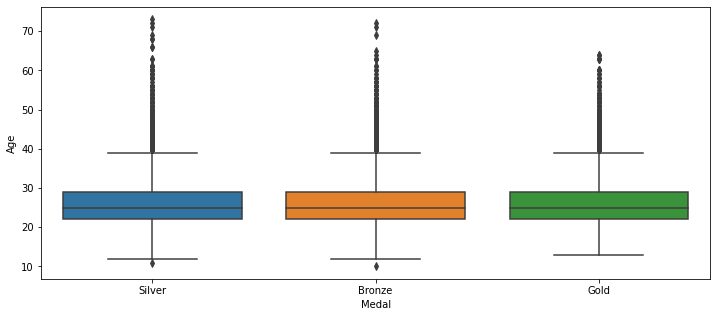

In [9]:
# make sure to drop the non values from Age coulumn and from 
plt.figure(figsize=(12,5))
plt.tight_layout
mas1 = oly.Age.notnull()
mas2 = oly.Medal.notnull()
sns.boxplot(data=oly,x=oly['Medal'][mas2],y=oly['Age'][mas1])

Let's plot the most contries appear in the olypic games 

In [10]:
top_c = oly.Team.value_counts().head(10)
top_c

United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: Team, dtype: int64

<Axes: xlabel='top_country', ylabel='Team'>

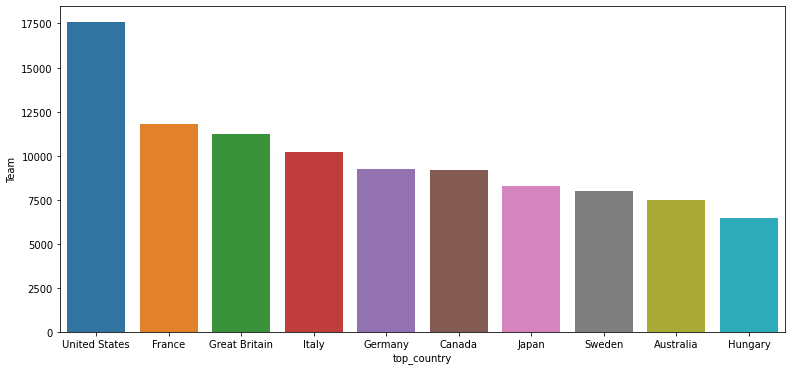

In [11]:
plt.figure(figsize=(13,6))
plt.xlabel("top_country")
sns.barplot(x=top_c.index,y=top_c)


let's see the diffrance between men and women in particpating in the 

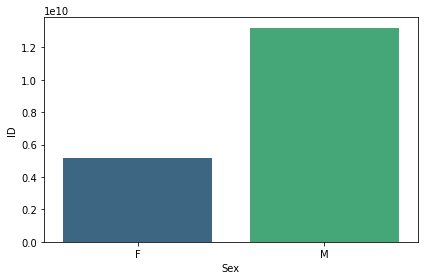

In [12]:

sex_comp = oly.groupby('Sex')['ID'].sum()
sns.barplot(x=sex_comp.index,y=sex_comp,palette='viridis')
plt.tight_layout()

<Axes: xlabel='Year', ylabel='counts'>

<Figure size 432x288 with 0 Axes>

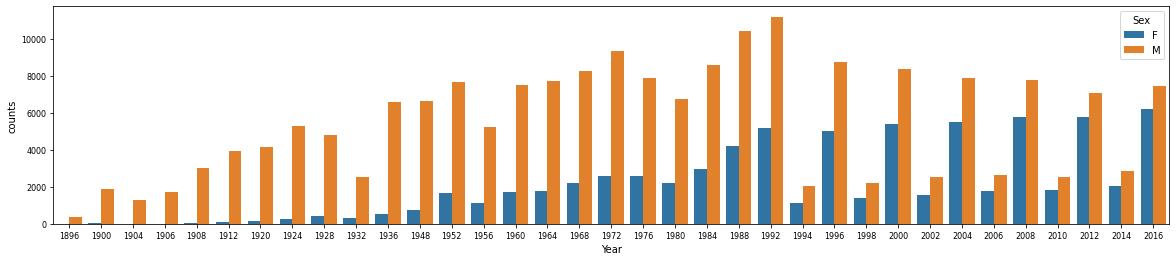

In [16]:
sex_year = oly[['Sex','Year']]
counts = sex_year.groupby(['Sex','Year']).size().reset_index(name='counts')
plt.tight_layout()
plt.figure(figsize=(20,4))
plt.tight_layout()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Years')
sns.barplot(x='Year',y='counts',hue='Sex',data=counts)

Let's see now what is the most common sport in olympic games 

<Axes: title={'center': 'Most famous sports in Olympic according to player participate of all time'}, xlabel='Sport', ylabel='Counts'>

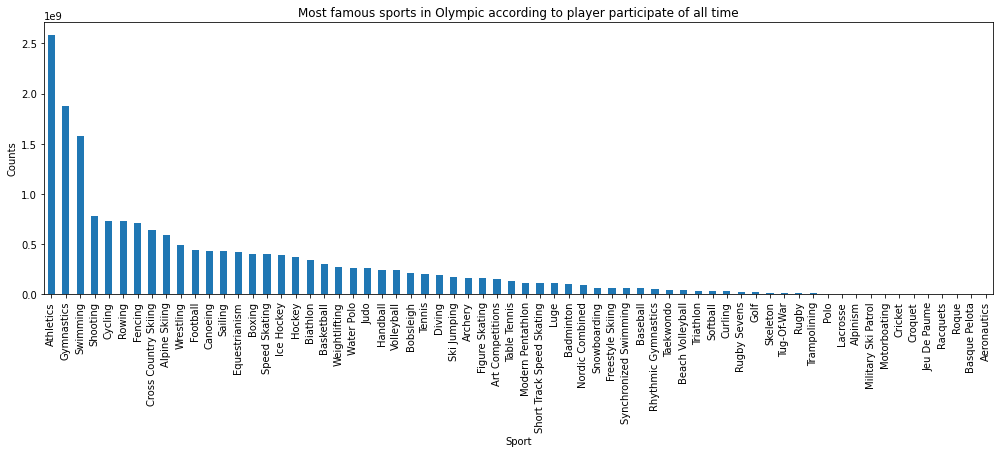

In [41]:
from matplotlib import figure
sport=oly.groupby(['Sport'])['ID'].sum().sort_values(ascending=False)
plt.figure(figsize=(17,5))
plt.tight_layout()
plt.ylabel('Counts')
plt.title('Most famous sports in Olympic according to player participate of all time')
sport.plot(kind='bar')

# Let's see the Medal in top 10 contries that collect medals

<Axes: xlabel='Team', ylabel='counts'>

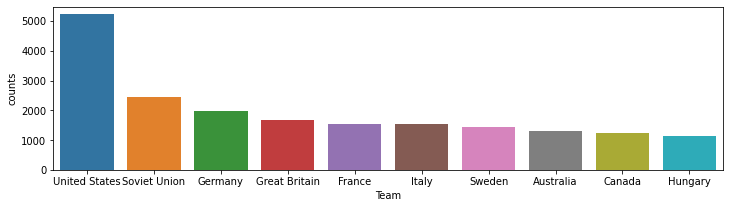

In [97]:

gr = oly.groupby(['Team'])['Medal'].count().sort_values(ascending=False).head(10)
gr = gr.reset_index(name='counts')
gr = pd.DataFrame(gr)
plt.figure(figsize=(12,3))
sns.barplot(x='Team', y='counts', data=gr)